In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')


In [2]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [3]:
sns.set_context('poster')

In [4]:
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['P', 'X', 'h', '<','>']
apallete = ['#6dad36', '#c7e89f', '#f5c4e1', '#d5579d', '#8a0850']

aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'

espallete = ['#6cf0ba', '#D55282', '#538B9B']

In [5]:
meta_df = pd.read_excel('exp 6 transfer Apr2019.xlsx', sheet_name='sent for seq')
meta_df.rename(columns={'#': 'sample_number'}, inplace=True)
meta_df.sample_number = pd.to_numeric(meta_df.sample_number)

In [6]:
dpath = os.path.join('DNA','dnaseq_trimmed', 'kraken_unmapped')

os.listdir(dpath)


['160003_MIT9313.bracken.species.txt',
 '160003_MIT9313.kraken.out',
 '160003_MIT9313.kraken.report',
 '160003_MIT9313.kraken_bracken_genuses.report',
 '160004.kraken.report',
 '160004_MIT0604.bracken.species.txt',
 '160004_MIT0604.kraken.out',
 '160004_MIT0604.kraken.report',
 '160004_MIT0604.kraken_bracken_genuses.report',
 '160005_MIT9313.bracken.species.txt',
 '160005_MIT9313.kraken.out',
 '160005_MIT9313.kraken.report',
 '160005_MIT9313.kraken_bracken_genuses.report',
 '160006_MIT9313.bracken.species.txt',
 '160006_MIT9313.kraken.out',
 '160006_MIT9313.kraken.report',
 '160006_MIT9313.kraken_bracken_genuses.report',
 '160007_MIT9313.bracken.species.txt',
 '160007_MIT9313.kraken.out',
 '160007_MIT9313.kraken.report',
 '160007_MIT9313.kraken_bracken_genuses.report',
 '160008_MIT9313.bracken.species.txt',
 '160008_MIT9313.kraken.out',
 '160008_MIT9313.kraken.report',
 '160008_MIT9313.kraken_bracken_genuses.report',
 '160009_MIT9313.bracken.species.txt',
 '160009_MIT9313.kraken.out',


# Unmapped BLAST

In [26]:
from glob import glob
unmapped_header = ['query id', 'subject id', '% identity', 'alignment length', 'mismatches', 'gap opens', 
                   'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', 
                   'subject tax ids', 'subject sci names'
]

def _read_blast_tsv(fpath):
    #  'snippy_5_MIT9313_filtered.R1.blastn.tsv',
    df = pd.read_csv(fpath, names=unmapped_header, sep='\t', #comment='#'
                    ) 
    name, read, _,_ = os.path.split(fpath)[-1].split('.')
    _, sample_number, species, _ = name.split('_')
    df['sample_number'] = sample_number
    df['species'] = species
    df['read'] = read
    return df

    
df_blast = pd.concat([_read_blast_tsv(i) for i in glob(os.path.join(dpath, 'snippy_*.blastn.tsv'))])



In [37]:
df_blast.sample_number= pd.to_numeric(df_blast.sample_number)
df_blast = pd.merge(df_blast, meta_df, on='sample_number', how='left')

In [38]:
df_blast.head()

,query id,subject id,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,...,sample_number,species,read,sample,PRO,ALT,exp,days,ng/ul,final volume
0,MISEQ:1:1101:2043:10556#AGGAGTCGTTAGGCTT/1,gi|1189886027|ref|NZ_FWFR01000002.1|,80.588,170,28,4,48,213,92727,92895,...,10,MIT0604,R1,5A,MIT0604,1A3,2,100,4.28,100
1,MISEQ:1:1101:2043:10556#AGGAGTCGTTAGGCTT/1,gi|1403074190|ref|NZ_NKUF01000004.1|,82.022,89,14,2,52,139,44029,43942,...,10,MIT0604,R1,5A,MIT0604,1A3,2,100,4.28,100
2,MISEQ:1:1101:2052:14895#AGGAGTCGTTAGGCTT/1,gi|1189886026|ref|NZ_FWFR01000001.1|,87.500,72,9,0,54,125,1629191,1629262,...,10,MIT0604,R1,5A,MIT0604,1A3,2,100,4.28,100
3,MISEQ:1:1101:2147:14254#AGGAGTCGTTAGGCTT/1,gi|1546922773|ref|NZ_ML133689.1|,80.488,205,31,7,57,255,489313,489514,...,10,MIT0604,R1,5A,MIT0604,1A3,2,100,4.28,100
4,MISEQ:1:1101:2147:14254#AGGAGTCGTTAGGCTT/1,gi|1801202560|ref|NZ_WUMK01000012.1|,86.667,135,14,4,96,228,3328,3196,...,10,MIT0604,R1,5A,MIT0604,1A3,2,100,4.28,100


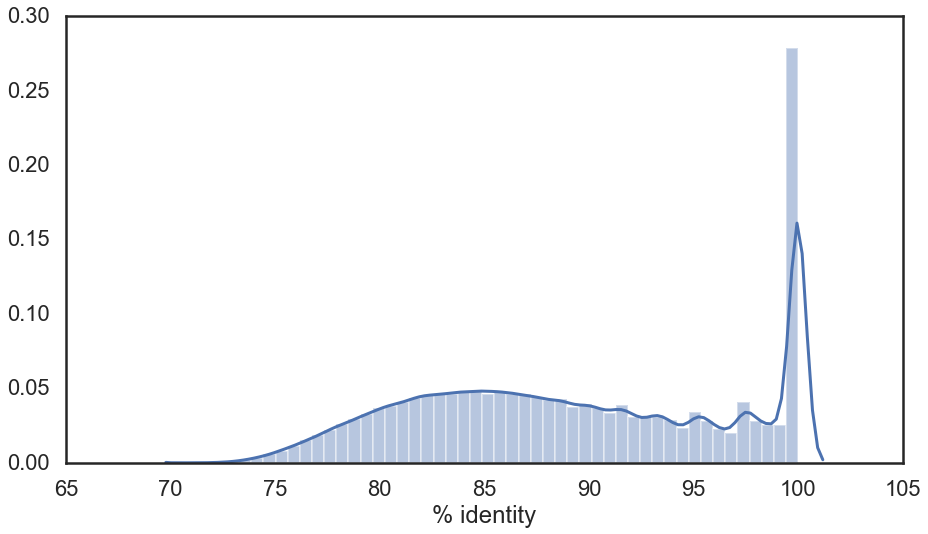

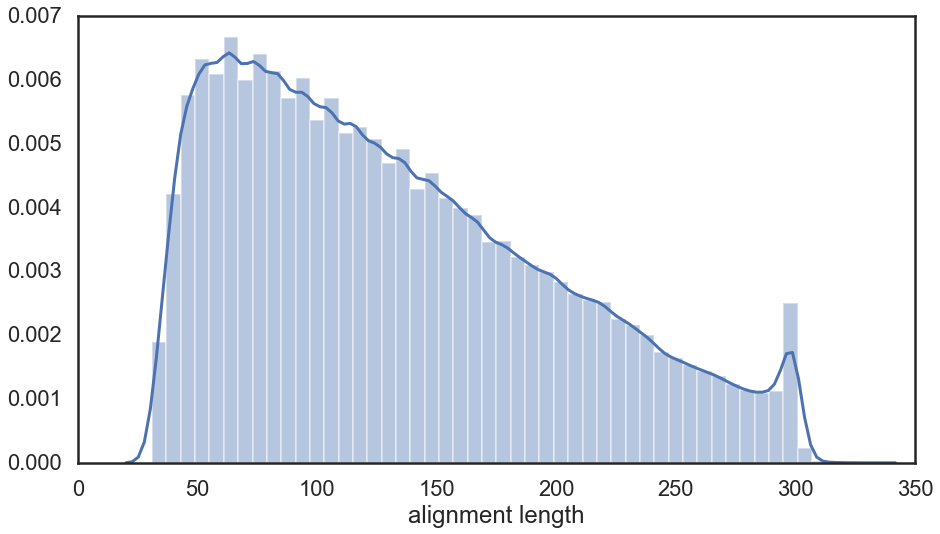

In [18]:
#unmapped_header = ['query id', 'subject id', '% identity', 'alignment length', 'mismatches', 'gap opens', 
#                   'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', 
#                   'subject tax ids', 'subject sci names'
#]

sns.distplot(df_blast['% identity'])
plt.show()
sns.distplot(df_blast['alignment length'])
plt.show()




In [29]:
df_blast['query id'].value_counts()

MISEQ:1:1101:7951:18666#AGGAGTCGTTAGGCTT/2     68
MISEQ:1:2110:7024:7338#GGTCCGCTCTCACACA/2      67
MISEQ:1:1101:7951:18666#AGGAGTCGTTAGGCTT/1     67
MISEQ:1:2110:7024:7338#GGTCCGCTCTCACACA/1      67
MISEQ:1:2104:19629:3303#AATATTGCCGGTGACA/2     64
                                               ..
MISEQ:1:1104:12432:16620#CCGCTCCGTACGGCGA/2     1
MISEQ:1:1109:26932:10350#ATTAAGGTCGGATTAT/2     1
MISEQ:1:1115:15034:9011#ATACATCATCTCCATT/2      1
MISEQ:1:1108:19712:17102#TTCAAGTAGATGGTAT/1     1
MISEQ:1:2111:7940:22931#TTCAAGTAGATGGTAT/2      1
Name: query id, Length: 873186, dtype: int64

In [31]:
df_blast.groupby(['species', 'sample_number'])['subject sci names'].value_counts().nlargest(20)

species  sample_number  subject sci names               
MIT0604  20             Alteromonas macleodii ATCC 27126    140211
         17             Alteromonas macleodii ATCC 27126    120495
         16             Alteromonas macleodii ATCC 27126     83427
         20             Alteromonas marina                   59176
         18             Alteromonas macleodii ATCC 27126     56885
         17             Alteromonas marina                   50689
         20             Alteromonas abrolhosensis            47050
         17             Alteromonas abrolhosensis            41340
         16             Alteromonas marina                   34087
         20             Alteromonas sp. HB161718             32889
         17             Alteromonas sp. HB161718             28493
         14             Maricaulis maris MCS10               26652
         16             Alteromonas abrolhosensis            26311
         18             Alteromonas marina                   24504
     

In [30]:
df_blast.species.value_counts()

MIT0604    3177230
MIT9313      29964
Name: species, dtype: int64

In [45]:
df_taxa = df_blast.groupby(['sample_number', 'species', 'sample', 'PRO', 'ALT', 'exp', 'days', 'subject sci names'])['evalue'].count()
df_taxa = df_taxa.reset_index()
df_taxa.rename(columns={'evalue': 'count'}, inplace=True)
df_taxa.head()


,sample_number,species,sample,PRO,ALT,exp,days,subject sci names,count
0,3,MIT9313,Axenic,MIT9313,Axenic,0,0,'Cynodon dactylon' phytoplasma,2
1,3,MIT9313,Axenic,MIT9313,Axenic,0,0,Abyssibacter profundi,1
2,3,MIT9313,Axenic,MIT9313,Axenic,0,0,Acetobacter orleanensis JCM 7639,2
3,3,MIT9313,Axenic,MIT9313,Axenic,0,0,Acholeplasma modicum ATCC 29102,2
4,3,MIT9313,Axenic,MIT9313,Axenic,0,0,Achromobacter arsenitoxydans SY8,2


In [48]:
counts = df_taxa.groupby('subject sci names')['count'].sum()


In [56]:
no_alt_counts = counts.loc[~counts.index.str.contains('Alteromonas')]

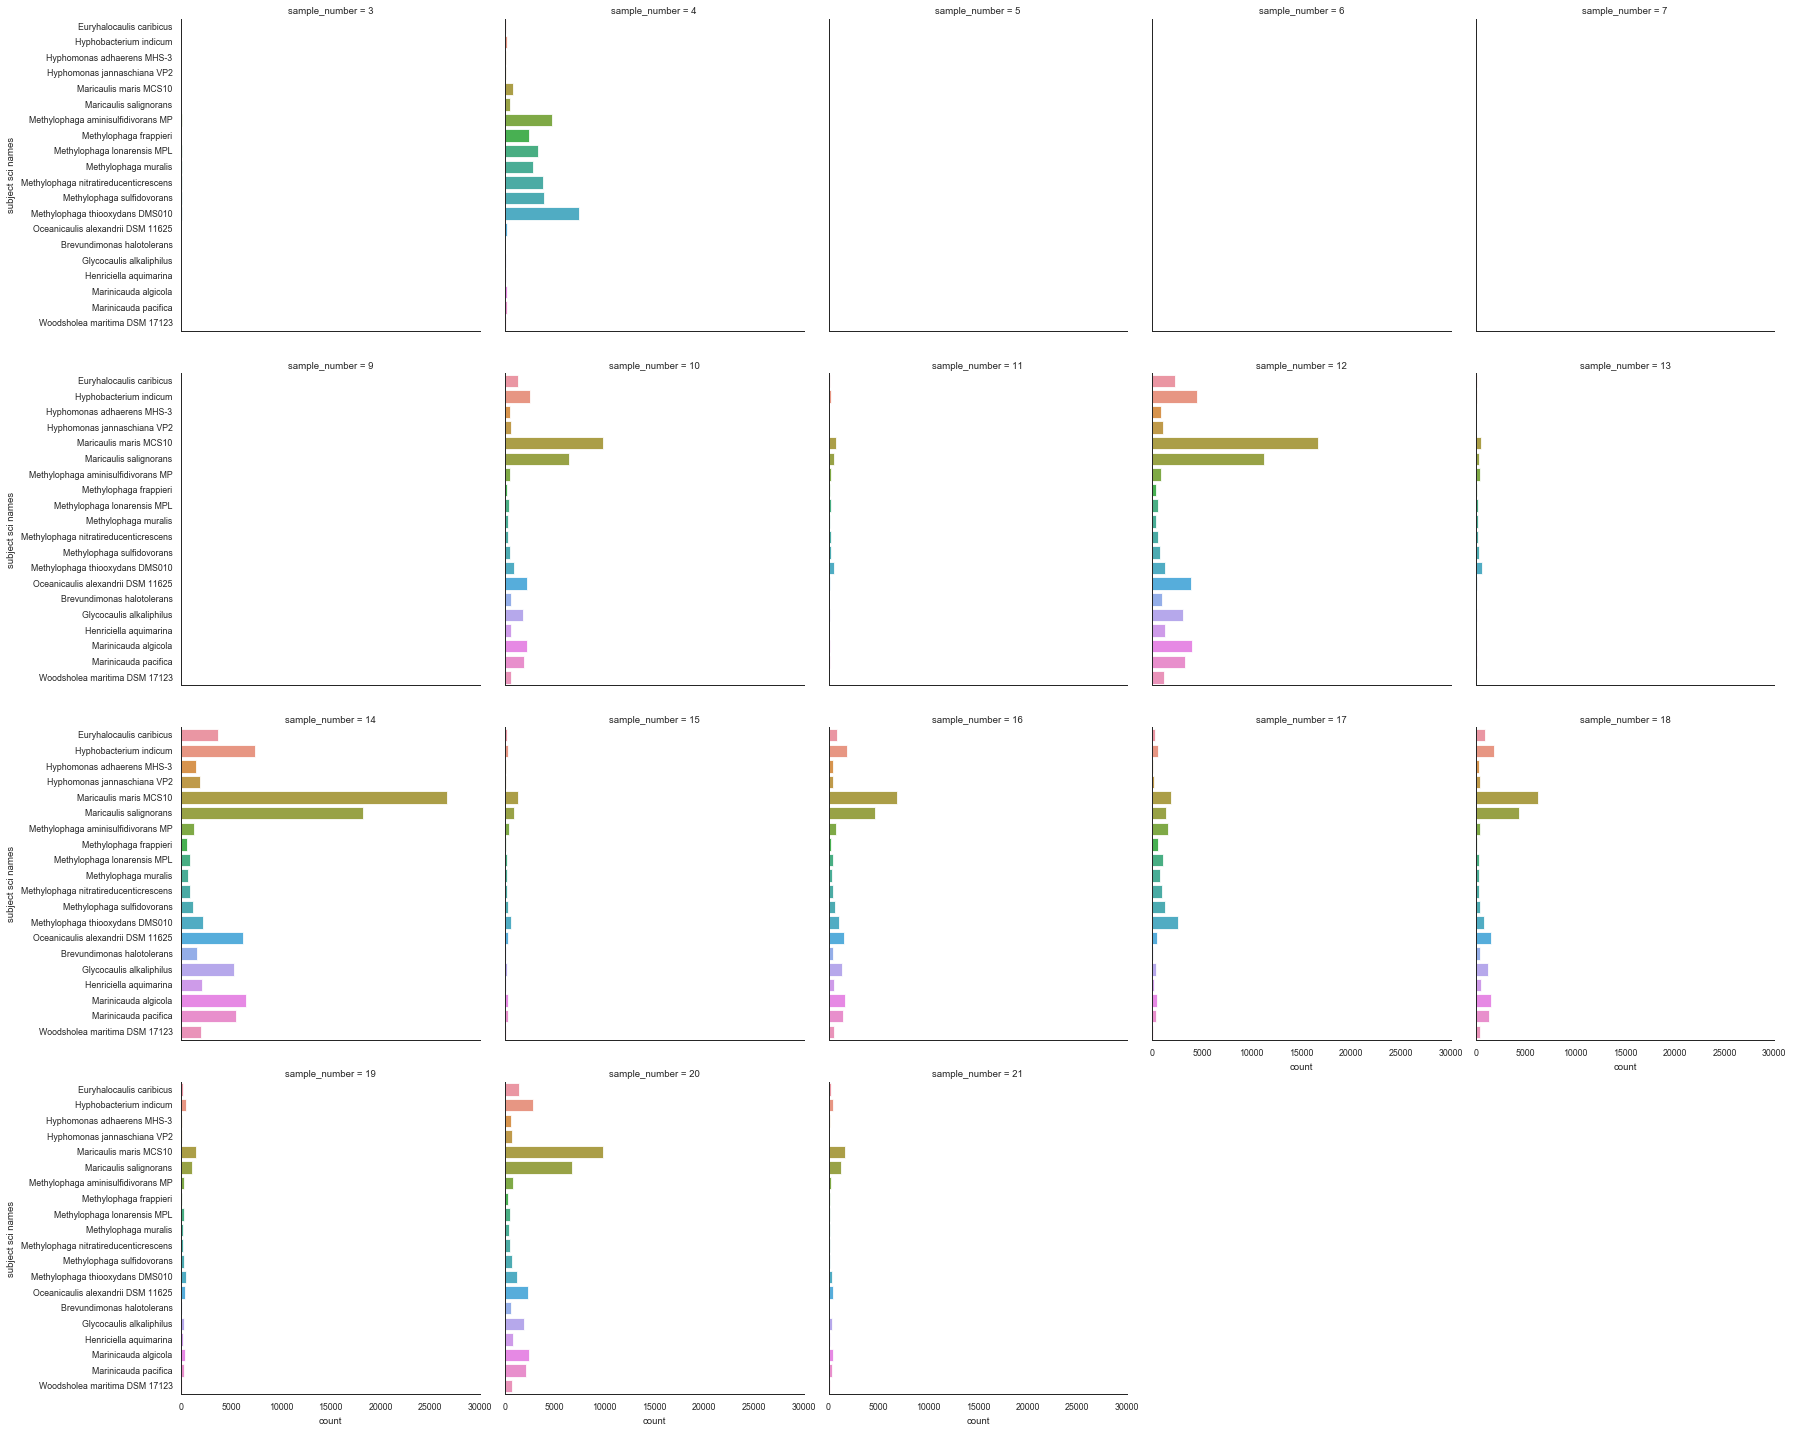

In [57]:
sns.set_context('paper')
sns.catplot(data=df_taxa.loc[df_taxa['subject sci names'].isin(no_alt_counts.nlargest(20).index)],
            y='subject sci names', x='count',
            col='sample_number', col_wrap=5,
            kind='bar')

In [70]:
from glob import glob
kraken_rep_header=['percent', 'reads', 'self_reads', 'level', 'id', 'taxa']
df = pd.read_csv(os.path.join(dpath,  '160004_MIT0604.kraken.report',), sep='\t', names=kraken_rep_header)
df['taxa'] = df['taxa'].str.strip()
df.head()

def _read_kraken_report(fpath):
    #  '160004_MIT0604.kraken.report',
    df = pd.read_csv(fpath, names=kraken_rep_header, sep='\t', #comment='#'
                    ) 
    name, _,_ = os.path.split(fpath)[-1].split('.')
    idx, species = name.split('_')
    sample_number = pd.to_numeric(idx) - 160000
    df['taxa'] = df['taxa'].str.strip()
    df['sample_number'] = sample_number
    df['species'] = species
    return df

    
df_kraken_rep = pd.concat([_read_kraken_report(i) for i in glob(os.path.join(dpath, '*_*.kraken.report'))])



In [71]:
df_kraken_rep.head()

,percent,reads,self_reads,level,id,taxa,sample_number,species
0,46.61,1279,1279,U,0,unclassified,3,MIT9313
1,53.39,1465,0,R,1,root,3,MIT9313
2,53.39,1465,0,R1,131567,cellular organisms,3,MIT9313
3,52.73,1447,13,D,2,Bacteria,3,MIT9313
4,43.99,1207,0,D1,1783272,Terrabacteria group,3,MIT9313


In [72]:
df_kraken_rep.loc[df_kraken_rep.taxa.isin(['unclassified'])]

,percent,reads,self_reads,level,id,taxa,sample_number,species
0,46.61,1279,1279,U,0,unclassified,3,MIT9313
0,86.16,73101,73101,U,0,unclassified,4,MIT0604
0,44.80,1559,1559,U,0,unclassified,5,MIT9313
0,52.96,635,635,U,0,unclassified,6,MIT9313
0,45.11,1749,1749,U,0,unclassified,7,MIT9313
0,27.27,3,3,U,0,unclassified,8,MIT9313
0,66.43,734,734,U,0,unclassified,9,MIT9313
0,85.50,96578,96578,U,0,unclassified,10,MIT0604
0,86.64,13609,13609,U,0,unclassified,11,MIT0604
0,83.87,170745,170745,U,0,unclassified,12,MIT0604


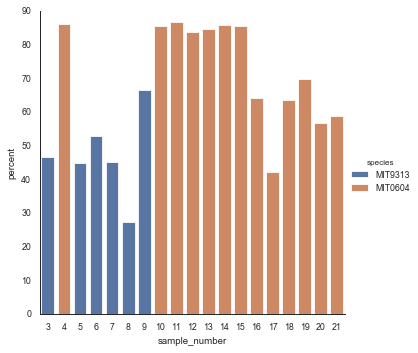

In [76]:
sns.catplot(data=df_kraken_rep.loc[df_kraken_rep.taxa.isin(['unclassified'])],
           x='sample_number', y='percent', hue='species', dodge=False, kind='bar')

In [ ]:
F